In [1]:
# Load the necessary libraries and the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
# Load the data
df = pd.read_excel('glass.xlsx', sheet_name='glass')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### 1. Exploratory Data Analysis (EDA):

In [3]:
## Rows and columns
df.shape

(214, 10)

In [4]:
## Getting the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
## Summary statistics:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
# Check for missing values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
## Duplicates:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [9]:
df.duplicated().sum()

0

In [10]:
## Class distribution:
df['Type'].value_counts()

Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64

## 2: Data Visualization:

###  Histograms:

<Figure size 2000x1500 with 0 Axes>

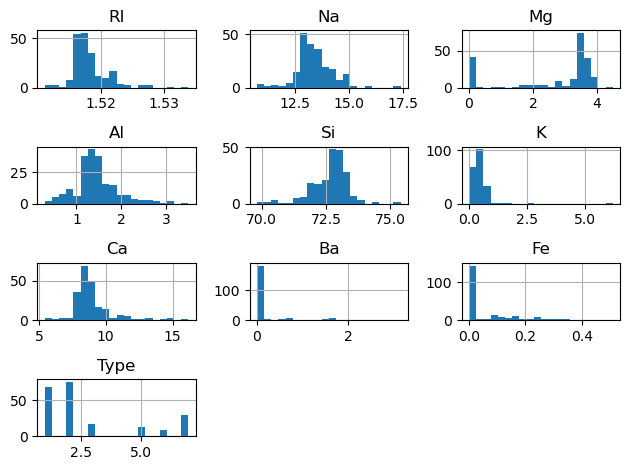

In [11]:
plt.figure(figsize=(20,15))
df.hist(bins=20)
plt.tight_layout()
plt.show()

## Box plots

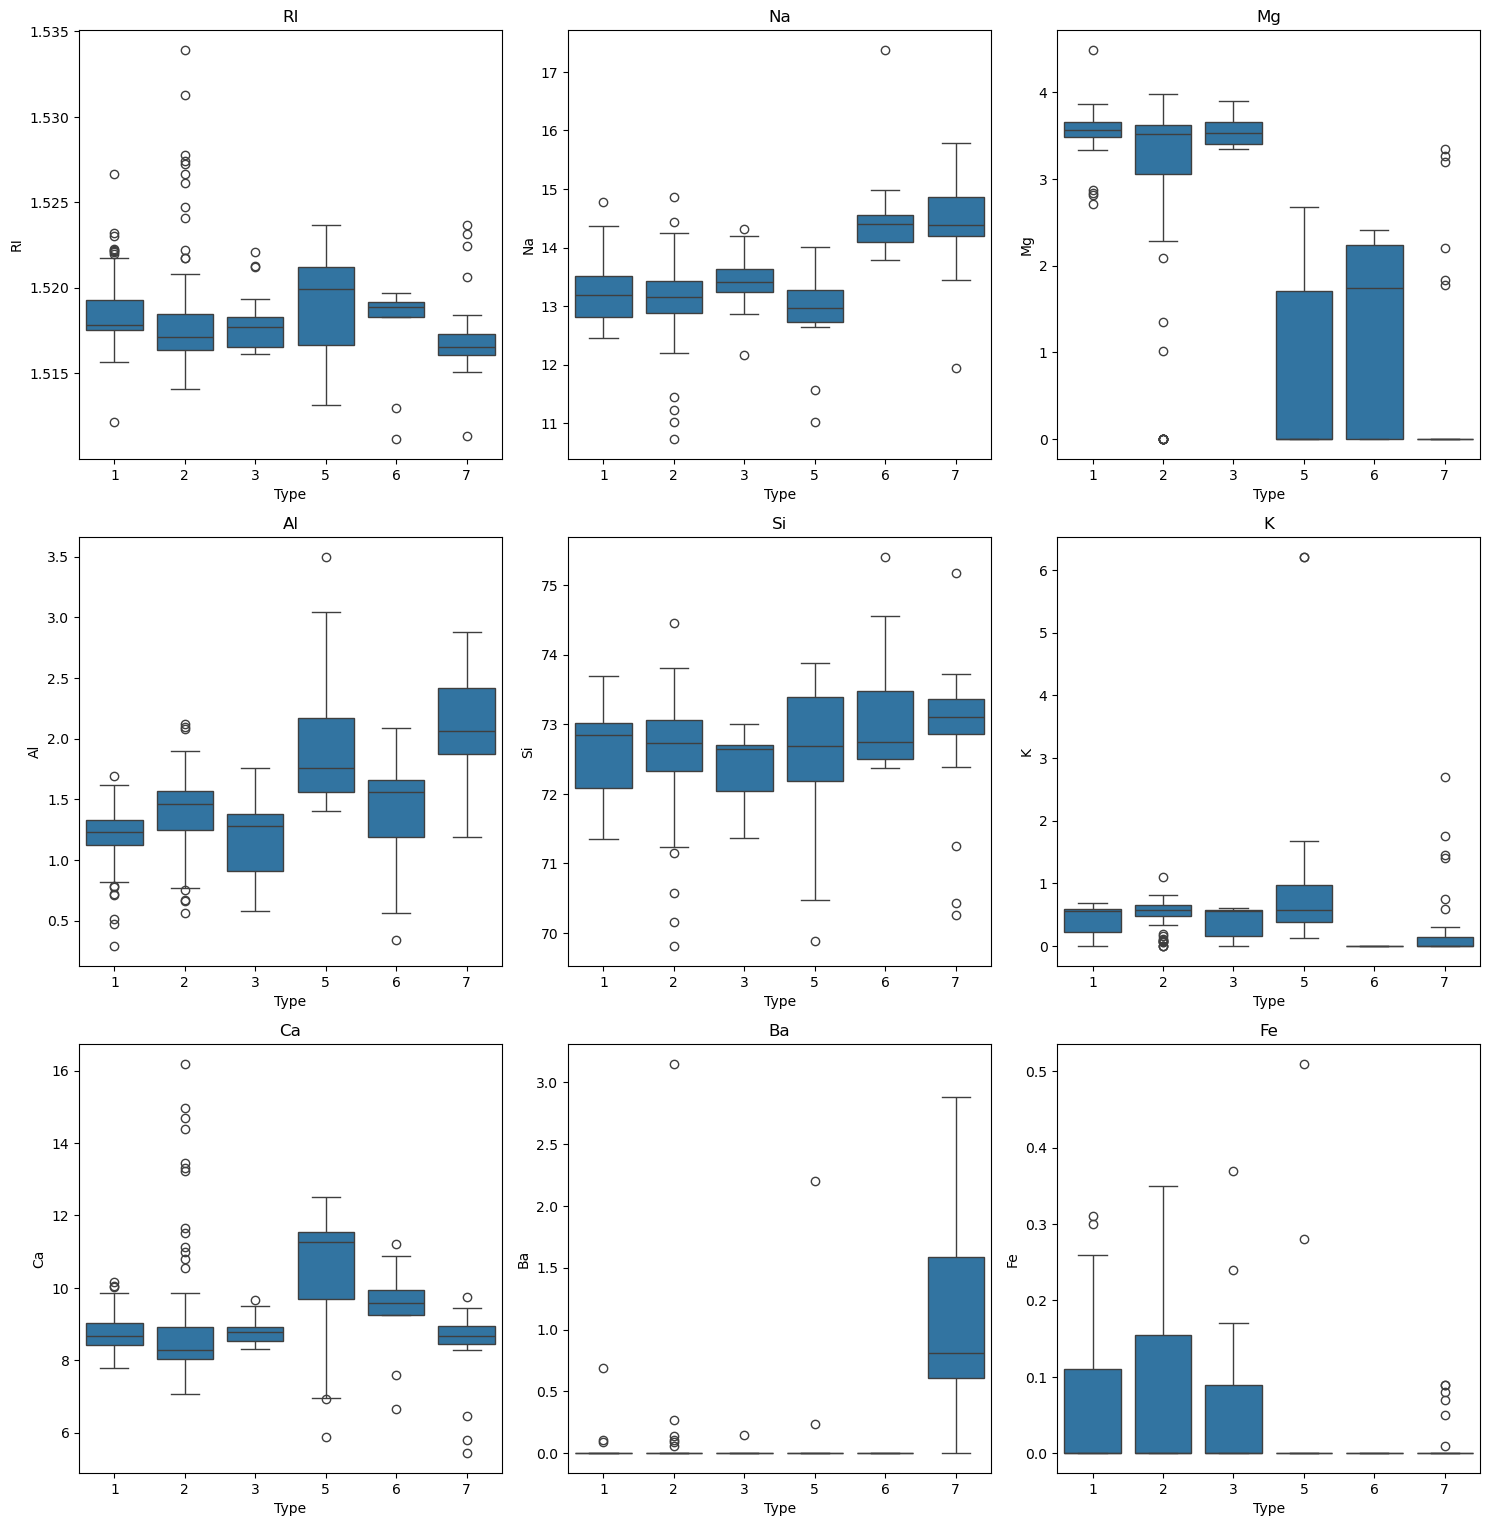

In [12]:
plt.figure(figsize=(15,20))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='Type', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

## Pair plots

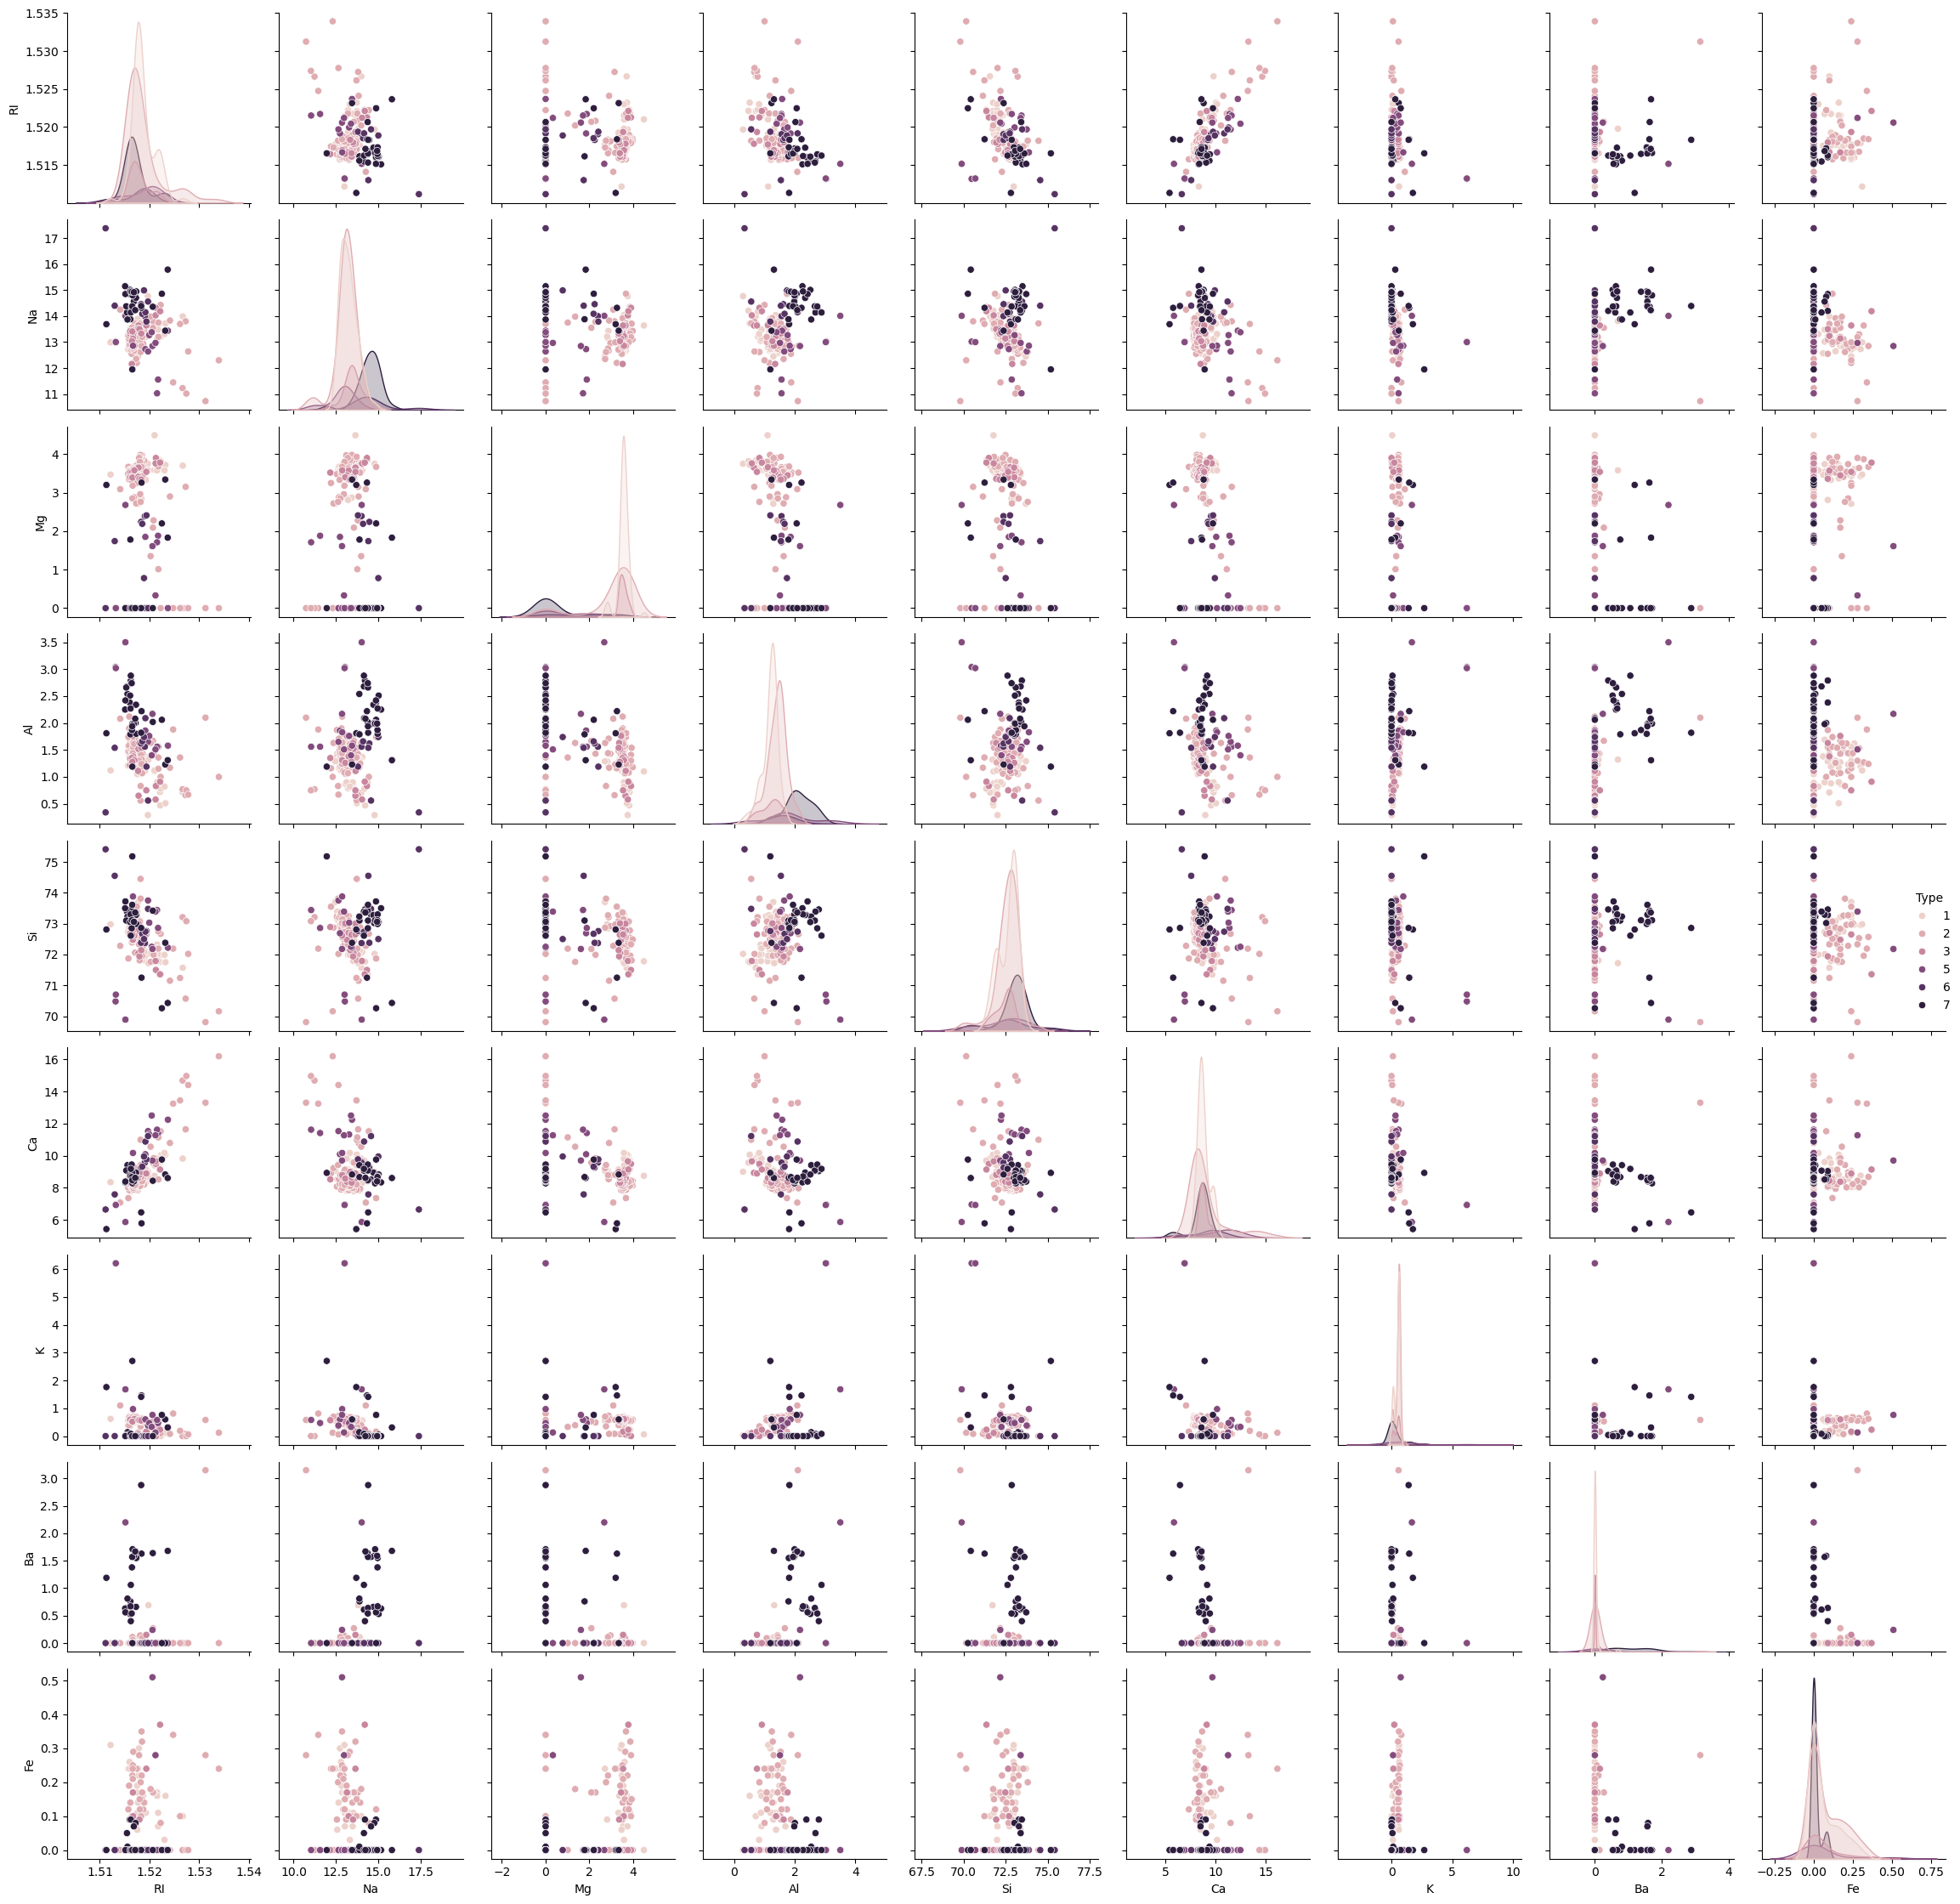

In [13]:
# Pair plot -- features
sns.pairplot(df[['RI', 'Na', 'Mg', 'Al', 'Si', 'Ca','K', 'Ba', 'Fe', 'Type']], hue='Type')
plt.tight_layout()
plt.show()

## correlations 

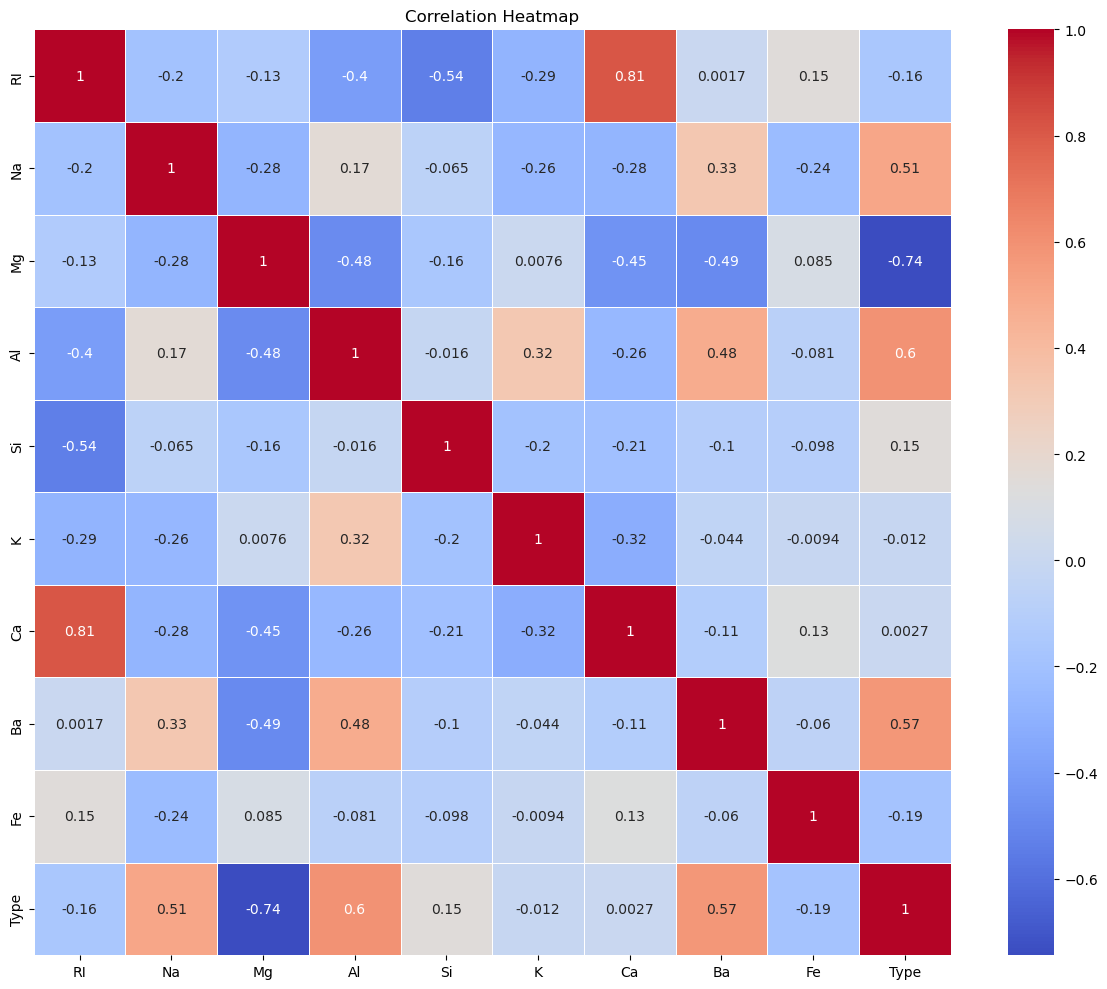

In [14]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## 3: Data Preprocessing

In [15]:
# Separate features and target
features = df.drop('Type', axis=1)
target = df['Type']

In [16]:
# Apply feature scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [17]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
features_resampled, target_resampled = smote.fit_resample(features_scaled, target)
features_resampled, target_resampled

(array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
         -0.35380764, -0.58830108],
        [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
         -0.35380764, -0.58830108],
        [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
         -0.35380764, -0.58830108],
        ...,
        [-0.71961567, -0.91085578, -1.86017161, ...,  0.10819329,
          0.25045419, -0.55021375],
        [-0.42064516,  1.83645824, -1.86017161, ..., -0.3187045 ,
          2.87103559, -0.58830108],
        [-0.39321084,  1.54520321, -1.86017161, ..., -0.89893678,
          3.87266823, -0.58830108]]),
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 451    7
 452    7
 453    7
 454    7
 455    7
 Name: Type, Length: 456, dtype: int64)

In [18]:
# Split the data
x_train,x_test,y_train,y_test = train_test_split(features_resampled,target_resampled,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(364, 9)
(92, 9)
(364,)
(92,)


## 4: Random Forest Model Implementation

In [19]:
# Random Forest
rand_forest = RandomForestClassifier(n_estimators=100,max_features='sqrt',bootstrap=True,max_samples=0.9,random_state=42)
rand_forest.fit(x_train, y_train)

RandomForestClassifier(max_samples=0.9, random_state=42)

In [20]:
# Train and evaluate random forest classifier
rand_forest_pred = rand_forest.predict(x_test) # Make predictions using the trained model and store it in rf_pred
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rand_forest_pred))
print("\nRandom Forest Classification Report:") # Print the classification report
print(classification_report(y_test, rand_forest_pred))


Random Forest Performance:
Accuracy: 0.9456521739130435

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.94      0.89      0.92        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.95        92
   macro avg       0.94      0.95      0.95        92
weighted avg       0.95      0.95      0.95        92



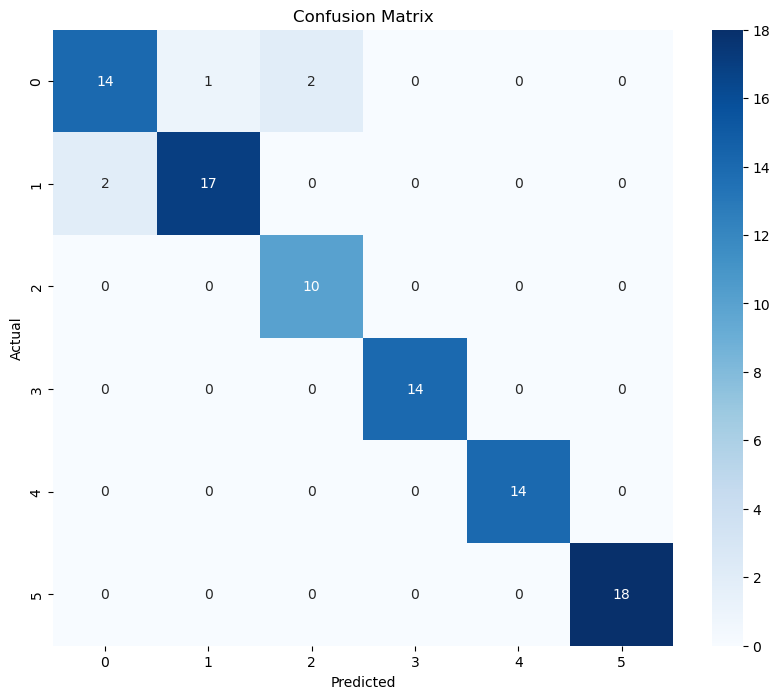

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, rand_forest_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

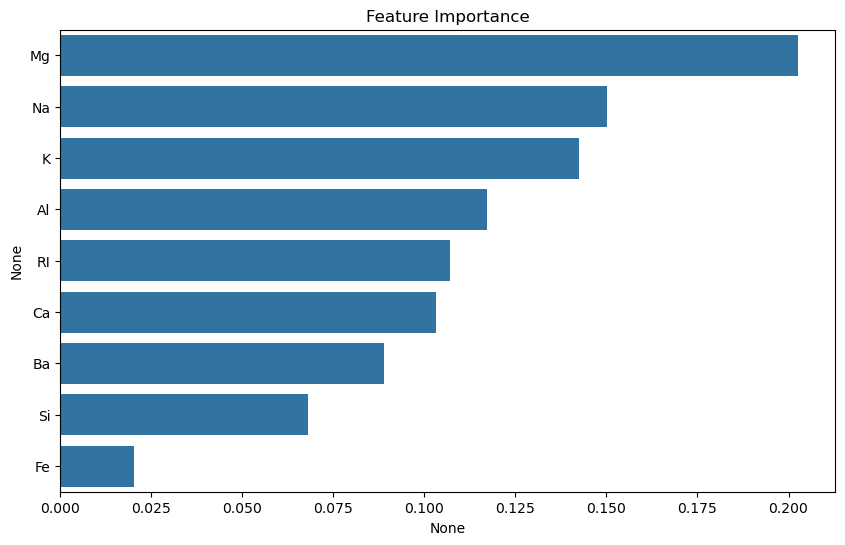

In [22]:
feature_imp = pd.Series(rand_forest.feature_importances_, index=features.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance')
plt.show()

## 5: Bagging and Boosting Methods

### Bagging Method

In [23]:
bag_class=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=100,random_state=42)
bag_class.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [24]:
y_pred_bag = bag_class.predict(x_test)
accuracy_score(y_test,y_pred_bag)

0.9347826086956522

In [25]:
print("\nBagging Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_bag))
print("\nBagging Classification Report:")
print(classification_report(y_test, y_pred_bag))


Bagging Performance:
Accuracy: 0.9347826086956522

Bagging Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.82      0.82        17
           2       0.94      0.84      0.89        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.93        92
   macro avg       0.93      0.94      0.94        92
weighted avg       0.94      0.93      0.93        92



### Boosting Method

In [26]:
## Gradient_Boosting
grad_boost=GradientBoostingClassifier(n_estimators=100,learning_rate=0.5,subsample=0.9,max_features=0.9,random_state=50)
grad_boost.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, max_features=0.9, random_state=50,
                           subsample=0.9)

In [27]:
y_pred_boost=grad_boost.predict(x_test)
accuracy_score(y_test,y_pred_boost)

0.9456521739130435

In [28]:
print("\nGradient_Boosting Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_boost))
print("\nGradient_Boosting Classification Report:")
print(classification_report(y_test, y_pred_boost))


Gradient_Boosting Performance:
Accuracy: 0.9456521739130435

Gradient_Boosting Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.82      0.88        17
           2       1.00      0.95      0.97        19
           3       0.77      1.00      0.87        10
           5       0.93      1.00      0.97        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.95        92
   macro avg       0.94      0.95      0.94        92
weighted avg       0.95      0.95      0.95        92



## compare the results

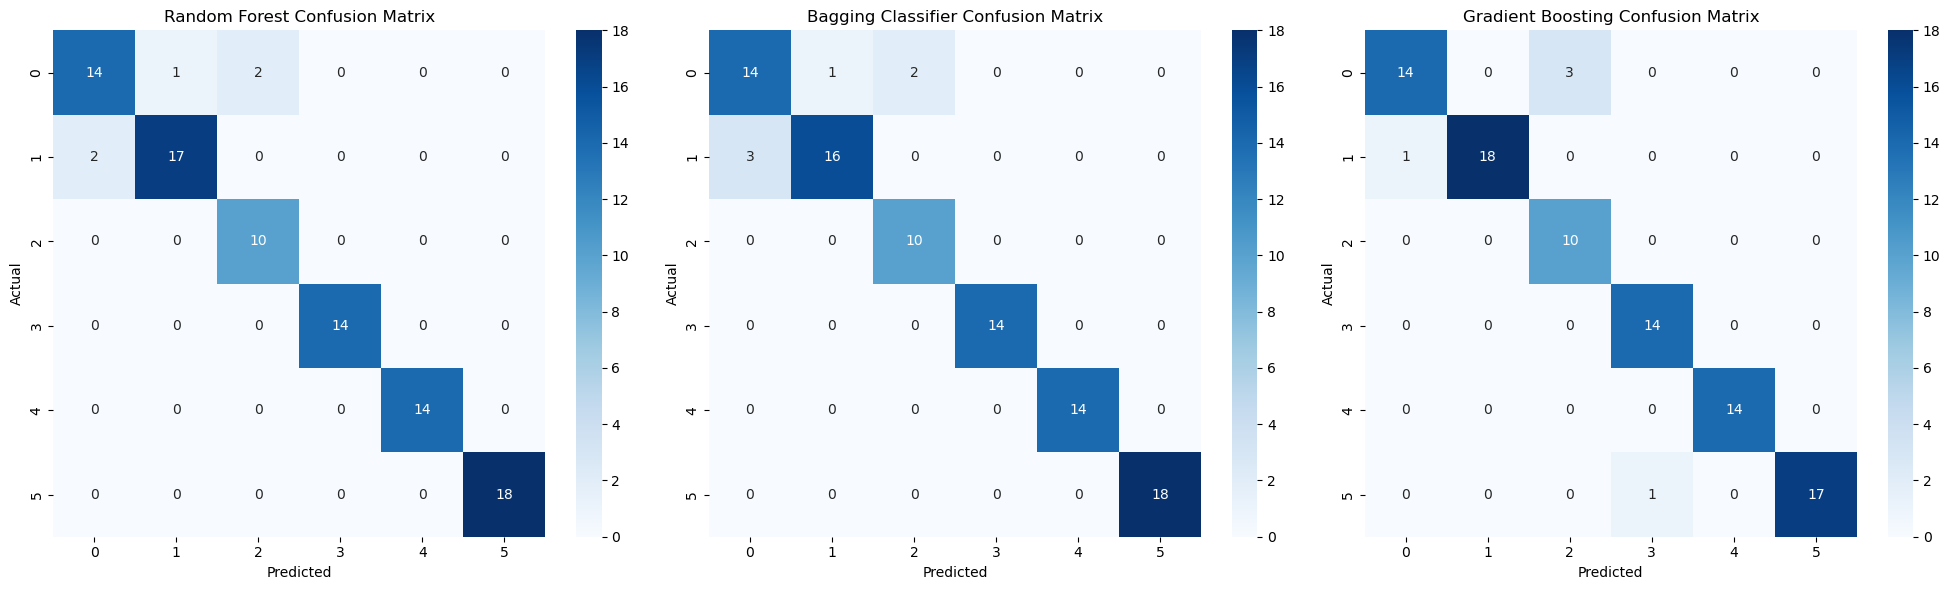

In [29]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.heatmap(confusion_matrix(y_test, rand_forest_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0])
sns.heatmap(confusion_matrix(y_test, y_pred_bag), annot=True, fmt='d', cmap='Blues', ax=axes[1])
sns.heatmap(confusion_matrix(y_test, y_pred_boost), annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[1].set_title('Bagging Classifier Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[2].set_title('Gradient Boosting Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
plt.tight_layout()
plt.show()

## 1. Explain Bagging and Boosting methods. How is it different from each other

** Bagging and Boosting are both ensemble learning techniques that combine multiple models (usually decision trees) to improve overall performance and reduce overfitting

### Bagging Method:

** Bagging builds multiple models independently in parallel using random subsets of data with replacement. It reduces variance and helps prevent overfitting.
Example: Random Forest

### Boosting Method:

** Boosting builds models sequentially, where each model learns from the errors of the previous one. It reduces both bias and variance, making the overall model more accurate.
Examples: AdaBoost, Gradient Boosting, XGBoost

## Different from each other:
** Bagging focuses on stability and variance reduction, while Boosting focuses on correcting errors and reducing bias.
** Bagging models are trained independently, but Boosting models are dependent on each other.
** Boosting is usually more accurate, but also more prone to overfitting if not properly tuned.

## 2. Explain how to handle imbalance in the data

** Handling imbalanced data is important when one class significantly outnumbers the other, which can cause the model to be biased toward the majority class
** Imbalanced data occurs when the classes in a dataset are not represented equally. Here are some strategies to handle it:

#### 1. Resampling Methods:
*** Oversampling (Minority class): Increase the number of instances in the minority class by duplicating them or generating synthetic samples (e.g., using SMOTE)-----(Synthetic Minority Oversampling Technique)
*** Undersampling (Majority class): Reduce the number of instances in the majority class by randomly removing samples.
#### 2.Use Different Evaluation Metrics:
*** Use metrics that are suitable for imbalanced data, such as precision, recall, F1-score, and the area under the ROC curve (AUC-ROC), instead of accuracy.
##### 3.Use Specialized Algorithms:
*** Use algorithms that are robust to class imbalance, such as decision trees or ensemble methods like Random Forests and Gradient Boosting.
##### 4.Cost-sensitive Learning:
*** Modify the learning algorithm to give more importance to the minority class by adjusting the class weights.
*** Most classifiers (e.g., LogisticRegression, RandomForest in scikit-learn) support class_weight='balanced'.
##### 5.Data Collection:
*** If possible, collect more data from the minority class.

These methods help in improving the model's performance on imbalanced datasets by ensuring that the minority class is adequately represented and considered during training.